In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import LabelEncoder

In [7]:
X=df.drop(['Id','Species'],axis=1)
Y=LabelEncoder().fit_transform(df['Species'])

In [8]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [10]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.2,random_state=42)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

In [13]:
k=3
model=KNeighborsClassifier(n_neighbors=k)
model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)
print("Accuracy:",accuracy_score(Y_test,Y_pred))
print("Confusion Matrix:\n",confusion_matrix(Y_test,Y_pred))

Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


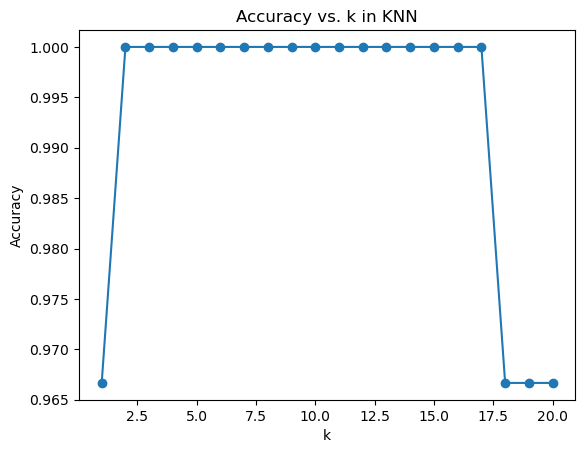

In [14]:
import matplotlib.pyplot as plt
accuracies=[]
for k in range(1,21):
    model=KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train,Y_train)
    Y_pred=model.predict(X_test)
    accuracies.append(accuracy_score(Y_test,Y_pred))
plt.plot(range(1,21),accuracies,marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. k in KNN')
plt.show()

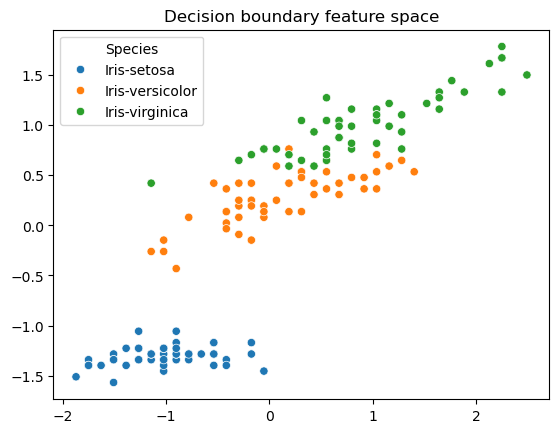

In [16]:
import seaborn as sns

sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 2], hue=df['Species'])
plt.title('Decision boundary feature space')
plt.show()